In [9]:
#Import potrzebnych modułów
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import math

#użyte testowo
#from sklearn.model_selection import train_test_split

#Użyte tylko do wyznaczania tablicy pomyłek
from sklearn.metrics import confusion_matrix

In [10]:
#Definicje przydatnych funkcji
def relu(x):
    return np.maximum(0,x)

def relu_derivative(x):
    return x > 0

def softmax(x):
    return np.exp(x)/sum(np.exp(x))

def softmax_derivative(x):
    pass

def scale(x):
    return (x-np.mean(x)) / np.std(x)    

In [11]:
#Załadowanie pliku csv do dataframe'u pandas
df = pd.read_csv('C:\\Users\\Michael\\Desktop\\data.csv',sep=",",names=['sepal_length','sepal_width','petal_length','petal_width','species'])

#Dodanie trzech nowych kolumn etykietujących porządany wynik
df['is_setosa'] = [1 if i == "Iris-setosa" else 0 for i in df['species']]
df['is_versicolor'] = [1 if i == "Iris-versicolor" else 0 for i in df['species']]
df['is_virginica'] = [1 if i == "Iris-virginica" else 0 for i in df['species']]

#Podział danych
xy1 = df.iloc[0:50,[0, 1, 2, 3, 5, 6, 7]].values
xy2 = df.iloc[50:100,[0, 1, 2, 3, 5, 6, 7]].values
xy3 = df.iloc[100:150,[0, 1, 2, 3, 5, 6, 7]].values

#Potasowanie trzech klas
np.random.shuffle(xy1)
np.random.shuffle(xy2)
np.random.shuffle(xy3)

xy1_train = xy1[0:40]
xy1_test = xy1[40:50]

xy2_train = xy2[0:40]
xy2_test = xy2[40:50]

xy3_train = xy3[0:40]
xy3_test = xy3[40:50]

xy_train = np.concatenate((xy1_train, xy2_train, xy3_train))
xy_test = np.concatenate((xy1_test, xy2_test, xy3_test))

x_train = xy_train[0:120,0:4]
y_train = xy_train[0:120,4:7]

x_test = xy_test[0:30,0:4]
y_test = xy_test[0:30,4:7]

#Podział danych - użycie sklearn
#x = df.iloc[0:150,[0, 1, 2, 3]].values
#y = df.iloc[0:150,[5, 6, 7]].values

#print(x.shape)

#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

print(x_train.shape)
print(y_train.shape)

#Skalowanie danych wejściowych
for i in range(0,4):
    x_train[:,i] = scale(x_train[:,i])
    x_test[:,i] = scale(x_test[:,i])

(120, 4)
(120, 3)


In [12]:
#Parametry sieci
learning_rate = 0.001
layers = [4,5,3]

#Inicjalizacja wartości wag i polaryzacji
w1 = np.random.uniform(low = -0.1, high = 0.1, size=(layers[1],layers[0]))
b1 = np.random.uniform(low = -0.1, high = 0.1, size=(layers[1],1))
        
w2 = np.random.uniform(low = -0.1, high = 0.1, size=(layers[2],layers[1]))
b2 = np.random.uniform(low = -0.1, high = 0.1, size=(layers[2],1))

print(w1.shape)

(5, 4)


In [13]:
epochs = 1000

cost = list()

for i in range(100000): #Tu nie zapomnij zmienić na epochs
        #1 Przejście od wejścia do warstwy ukrytej
        output11 = np.dot(w1,x_train.transpose())+b1
        output1 = relu(output11)
        
        #2 Od warstwy ukrytej do wyjścia
        output2 = softmax(np.dot(w2,output1)+b2)

        #3 Obliczenie błędu
        cost.append(-np.sum(y_train.T*np.log(output2))) #Używana funkcja - cross entropy
        
        error2 =  output2 - y_train.T #to jest pochodna cross entropy po aktywacji
        #Poprawki są uśrednianie po wszystkich próbkach uczących
        adjustments_w2 = 1/120 * error2.dot(output1.T) 
        adjustments_b2 = 1/120 * np.sum(error2)
        
        error1 = w2.T.dot(error2) * relu_derivative(output11)
        adjustments_w1 = 1/120 * error1.dot(x_train)
        adjustments_b1 = 1/120 * np.sum(error1)
        
        #4 Update w1,w2,b1,b2
        w1 = w1 - learning_rate * adjustments_w1
        w2 = w2 - learning_rate * adjustments_w2
        
        b1 = b1 - learning_rate * adjustments_b1
        b2 = b2 - learning_rate * adjustments_b2
        
#print(error2)
#print(adjustments_w2.shape)
#print(w2.shape)
#print(cost[9000])

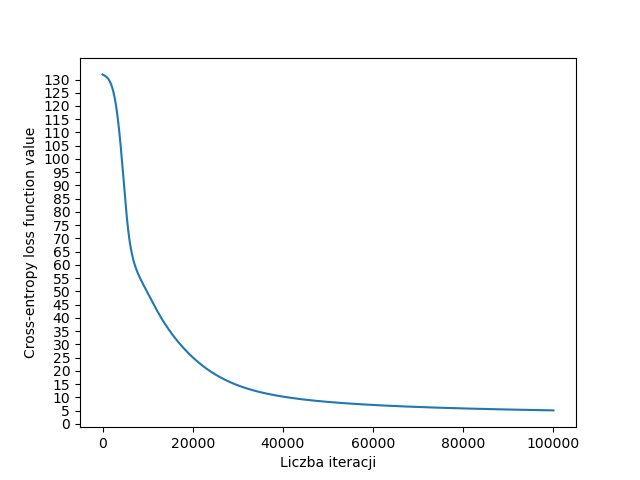

IndexError: list index out of range

In [14]:
#Rysowanie funkcji kosztu od iteracji
%matplotlib widget

plt.plot(cost)
plt.xlabel("Liczba iteracji")
plt.ylabel("Cross-entropy loss function value")
plt.yticks(np.arange(0, math.ceil(max(cost)), 5))
plt.show()
#print(cost[1000000-1])

In [15]:
#Testowanie otrzymanej sieci
output_test1 = relu(np.dot(w1,x_test.transpose())+b1)
output_test2 = softmax(np.dot(w2,output_test1)+b2)

predictions = np.argmax(output_test2,axis=0)
correct_classes = np.argmax(y_test.T,axis=0)

number_correct = (predictions == correct_classes).sum()
print(number_correct)
print(number_correct/30)

29
0.9666666666666667


[[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]


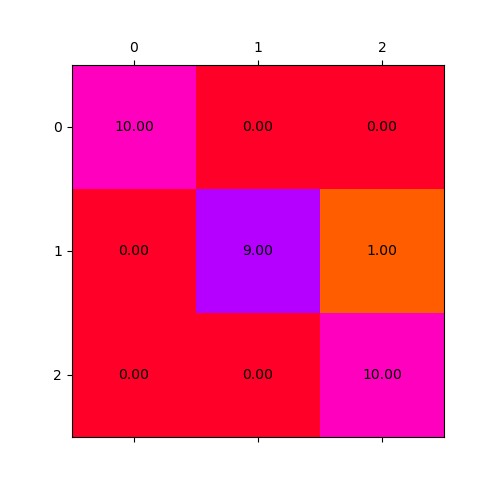

In [16]:
#Wyznaczenie czułości i specyficzności
a = confusion_matrix(y_true = correct_classes, y_pred = predictions)
print(a)

plt.matshow(a, cmap = 'gist_rainbow')
for (x, y), value in np.ndenumerate(a):
    plt.text(y, x, f"{value:.2f}", va="center", ha="center")
    
plt.show()

In [ ]:
print(cost[100000-1])

In [ ]:
#testy
test1 = np.array([[1,1,1],[1,3,1],[1,4,1]])
print(test1 - [1,0,1])

In [ ]:
test2 = np.array([1,1,4])
softmax(test2)

In [ ]:
print(y_train.size)

In [ ]:
np.sum(test1)

In [ ]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

In [ ]:
test3 = np.argmax(test1,axis=0)
print(test3)

In [ ]:
print(output2.shape)

In [ ]:
print(np.sum(output_test2[:,1]))

In [ ]:
test4 = np.array([1,1,4])
print(test4.shape)
test5 = np.array([1,1,5])
test6 = np.concatenate((test4,test5))
print(test6)

In [ ]:
print(y_test)

In [ ]:
print(error2.shape)
print(output1.T.shape)
print(adjustments_w2.shape)

In [ ]:
print(adjustments_b1)